<a href="https://colab.research.google.com/github/kaitlinblakeslee/DS2002F24/blob/main/SQLiteHW_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('students_grades.db')

# Check if the connection was successful
print("Database created and connected!")

Database created and connected!


In [76]:
# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Cursor created!


In [77]:
# Create the students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

print("Students table created!")

Students table created!


In [78]:
# Create the grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

print("Grades table created!")

Grades table created!


In [79]:
# Sample data to insert into the students table
students = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

# Insert data into the table
for student in students:
    student_id, first_name, last_name = student
    if student_id not in existing_ids:
        cursor.execute('''
        INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
        ''', (student_id, first_name, last_name))
        existing_ids.append(student_id)  # Update the list of existing IDs

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [55]:
# Fetch existing student IDs from the table
#cursor.execute('SELECT student_id FROM students')
#existing_ids = [row[0] for row in cursor.fetchall()]
#print("Existing student IDs:", existing_ids)

Existing student IDs: [1, 2, 3, 4, 5]


In [80]:
# Sample data to insert into the grades table (excluding grade_id)
grades = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85)
]

# Insert data into the grades table, letting the database handle grade_id
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")

Data inserted into the grades table!


In [83]:
# select all students names and their grades - join query
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
INNER JOIN grades ON students.student_id = grades.student_id;
''')

# Fetch and display the results
joined_data = cursor.fetchall()

# Use a set to store unique rows
unique_rows = set(joined_data)

print("Joined students and grades details:")
for row in unique_rows:
    print(row)




Joined students and grades details:
('Alice', 'Johnson', 'History', 90)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'Math', 95)
('Bob', 'Smith', 'History', 85)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'Math', 82)


In [84]:
# find the average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
INNER JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
''')

#display results
joined_gradedata = cursor.fetchall()

print("Average grade for each student:")
for row in joined_gradedata:
    print(row)


Average grade for each student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)


In [85]:
# find the student with the highest average grade
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
FROM students
INNER JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id, students.first_name, students.last_name
ORDER BY average_grade DESC
LIMIT 1
''')

# get the result
result = cursor.fetchone()

# Print the result
if result:
    print(f"Student with highest average grade: {result[0]} {result[1]}")
else:
    print("No results found.")

Student with highest average grade: Alice Johnson


In [86]:
#find average math grade
cursor.execute('''
SELECT AVG(grade) AS avg_mathgrade
FROM grades WHERE subject = 'Math'
''')

average_mathgrade = cursor.fetchone()[0]

# Display the result
print(f"Average math grade: {average_mathgrade}")

Average math grade: 88.5


In [87]:
# list all students who scored above 90 in any subject
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
INNER JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90
''')

#display results
joined_90data = cursor.fetchall()

print("Student who scored above 90:")
for row in joined_90data:
    print(row)

Student who scored above 90:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'Math', 95)


In [88]:
# Close the cursor
cursor.close()

# Explanation
print("Cursor closed!")

Cursor closed!


In [70]:
import pandas as pd

# Load data from the 'students' table into a DataFrame
students_df = pd.read_sql_query('SELECT * FROM students', connection)

# Load data from the 'grades' table into a DataFrame
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

In [71]:
# SQL query to join the students and grades tables
query = '''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
INNER JOIN grades ON students.student_id = grades.student_id;
'''

# Execute the query and load the result into a Pandas DataFrame
combined_df = pd.read_sql_query(query, connection)

#print(combined_df)

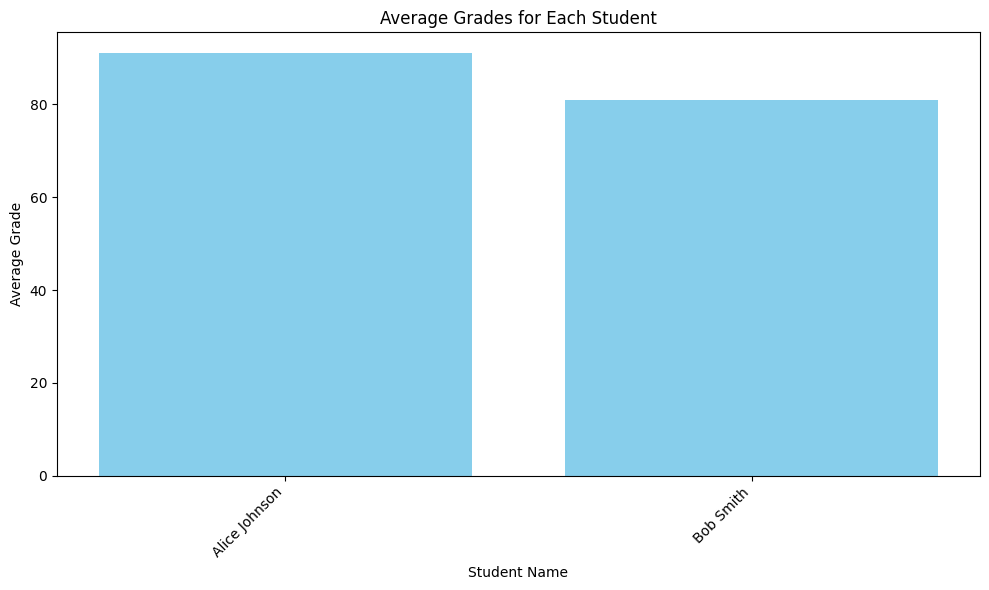

In [72]:
import matplotlib.pyplot as plt

# Calculate average grade for each student
average_grades_df = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

average_grades_df['student_name'] = average_grades_df['first_name'] + ' ' + average_grades_df['last_name']

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(average_grades_df['student_name'], average_grades_df['grade'], color='skyblue')

# Add labels and title
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap

plt.show()


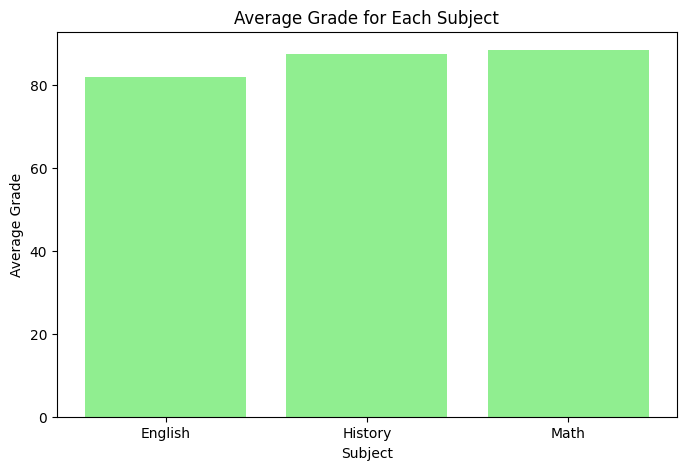

In [73]:
import matplotlib.pyplot as plt

average_grades_subject = combined_df.groupby('subject')['grade'].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(average_grades_subject['subject'], average_grades_subject['grade'], color='lightgreen')

# Add labels and title
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')

plt.show()